# Symbolic Regression with genetic programming

In [1]:
#Data manipulation, handling and function creation
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Genetic programming libraries
import gplearn as gp
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

In [2]:
# Plot properties
plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='notebook', font='Times New Roman', font_scale=1, style='ticks')
%matplotlib notebook

<IPython.core.display.Javascript object>


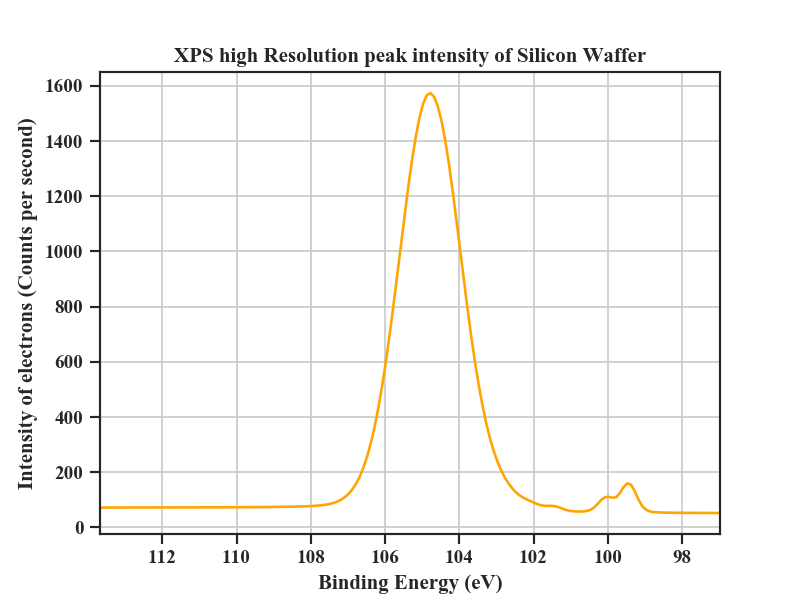

In [3]:
# Read a dataset
df = pd.read_csv('./11_Si2p.fit',sep='\t')

# Plot the contents to visualize 
plt.figure()
plt.plot(df.x, df.yCal, c='orange')
plt.title('XPS high Resolution peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.grid()
plt.xlim(df.x.max(), df.x.min())
plt.show()
X0 = np.array(df.x).reshape(-1, 1)

In [224]:
# Use the Symbolic Regressor to find a function
est_gp =  SymbolicRegressor(population_size=5000,
                           generations=100,
                           stopping_criteria=0.01,
                           function_set = ['add', 'sub', 'mul', 'div', 'sin'],                           p_crossover=0.7,
                           p_subtree_mutation=0.1,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=0)
# Fit with the data
est_gp.fit(np.array(df.x).reshape(-1, 1), np.array(df.yCal))

# Print the final result
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.51       3.2502e+11        7          170.876          416.229      7.65m
   1    23.63           109754       27          150.635          605.407      5.89m
   2    24.30           430587       32          156.911          553.839      5.57m
   3    25.57          59898.6      104          150.305          646.143      5.74m
   4    29.41           291337        7          155.992          547.919      5.91m
   5    33.94       2.6532e+06       19          156.339          535.286      6.16m
   6    37.86          47373.8       51          152.095          594.304      7.27m
   7    41.52      1.64492e+06       45           148.88          617.886      7.92m
   8    44.86          15283.3       74          155.953           542.23  

  94    87.22          1964.49       57          151.963          572.166     31.30s
  95    91.00          2721.62      163          154.386          443.165     25.45s
  96    97.50          1229.06      179          140.698          451.513     20.64s
  97   107.88          1732.06      176          142.957          438.513     14.12s
  98   127.68          53251.5      168          127.493          385.947      8.30s
  99   166.52          53533.3      165          125.388          390.625      0.00s
add(mul(div(0.672, X0), mul(X0, X0)), div(mul(X0, -0.688), add(sub(add(sub(sin(sub(add(sin(X0), div(add(sin(mul(sin(div(0.672, X0)), mul(X0, -0.688))), 0.796), mul(-0.060, -0.893))), add(sin(add(mul(X0, -0.688), div(sin(sin(add(-0.900, X0))), add(0.125, X0)))), add(div(0.408, -0.286), sin(X0))))), sub(sin(X0), sub(mul(sin(sin(sub(X0, div(0.672, X0)))), sin(0.861)), div(-0.125, sub(mul(div(sin(-0.406), mul(div(div(-0.125, mul(X0, -0.661)), X0), sin(X0))), X0), sin(X0)))))), div(add(mul(

In [4]:
# Since the functions are not defined in the python language, one can compute the operations:
def sub(a,b):
    return a-b
def add(a,b):
    return a+b
def mul(a,b):
    return a*b
def sin(a):
    return np.sin(a)
def div(a,b):
    return a/b
def log(a):
    return np.log(np.abs(a))
def cos(a):
    return np.cos(a)
def neg(a):
    return -1*a
def exp(x1):
    with np.errstate(over='ignore'):
        return np.where(np.abs(x1) < 50, np.exp(x1), 0.)
def sq(x1):
    return x1*x1
def cu(x1):
    return x1*x1*x1

# Now a copy and paste of the output can be generated

In [5]:
# Take the array
X0 = np.array(df.x)

# It is possible to copy and paste the results from the Symbolic Regression
# Since the functions are already defined, one can proceed to obtain the value
y= add(mul(div(0.672, X0), mul(X0, X0)), div(mul(X0, -0.688), add(sub(add(sub(sin(sub(add(sin(X0),
   div(add(sin(mul(sin(div(0.672, X0)), mul(X0, -0.688))), 0.796), mul(-0.060, -0.893))), 
   add(sin(add(mul(X0, -0.688), div(sin(sin(add(-0.900, X0))), add(0.125, X0)))), add(div(0.408,
   -0.286), sin(X0))))), sub(sin(X0), sub(mul(sin(sin(sub(X0, div(0.672, X0)))), sin(0.861)),
   div(-0.125, sub(mul(div(sin(-0.406), mul(div(div(-0.125, mul(X0, -0.661)), X0), sin(X0))), X0),
   sin(X0)))))), div(add(mul(X0, 0.752), mul(X0, -0.688)), add(add(div(0.680, -0.526), sin(sub(
   sin(sub(sin(mul(sub(sub(sin(X0), sin(add(mul(X0, -0.688), div(sin(sin(add(-0.900, X0))), 
   add(0.125, X0))))), mul(div(X0, X0), mul(X0, X0))), sin(sub(X0, X0)))), 0.125)), add(mul(X0,
   -0.688), sub(-0.929, 0.998))))), sin(X0)))), -0.688), div(sin(div(add(-0.409, X0), add(add(X0,
   0.578), -0.683))), add(sin(-0.538), X0)))))

<IPython.core.display.Javascript object>


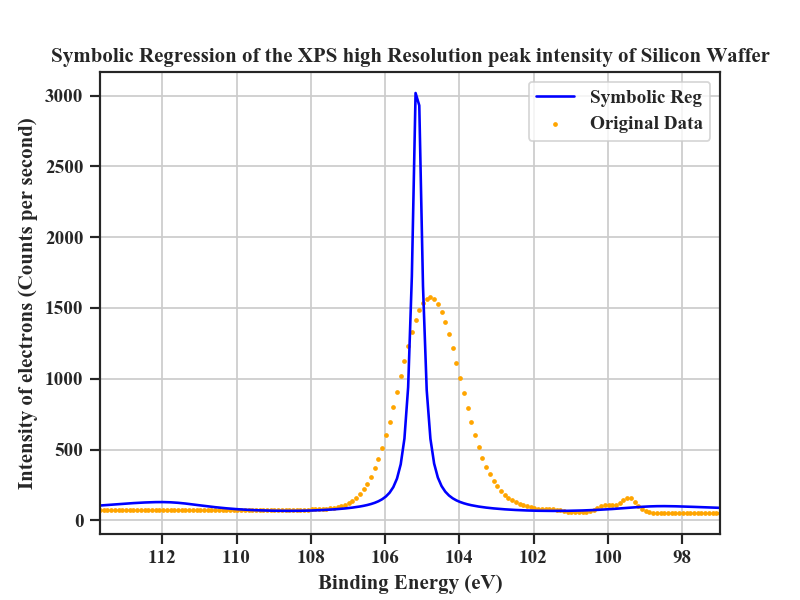

In [6]:
# Plot the contents to visualize 
plt.figure()
plt.scatter(X0, df.yCal, c='orange', label='Original Data', s=3)
plt.plot(X0, y, c='blue', label='Symbolic Reg')
plt.title('Symbolic Regression of the XPS high Resolution peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.legend()
plt.grid()
plt.xlim(df.x.max(), df.x.min())
plt.show()

In [8]:
# Use some of the created functions that are not in the common equation for the function set, 
# since this functions correspond better to the development of the plot,
#one can expect to obtain better approximations with the symbolic regression

exponential = make_function(function=exp, name='exp', arity=1)
squared = make_function(function=sq, name='sq', arity=1)
cubed = make_function(function=cu, name='cu', arity=1)

# Use the Symbolic Regressor to find a function
est_gp2 =  SymbolicRegressor(population_size=2000, 
                           const_range=(-5,5),
                           tournament_size = 10,
                           generations = 50,
                           stopping_criteria = 0.01,
                           function_set = ['add', 'sub', 'mul', 'div',
                                           'sin', exponential, 'neg', squared, cubed],
                           p_subtree_mutation=0.1,
                           p_crossover=0.7,
                           p_hoist_mutation=0.01,
                           max_samples=1.0,
                           verbose=1,
                           parsimony_coefficient=0.001)
# Fit with the data
est_gp2.fit(np.array(df.x).reshape(-1, 1), np.array(df.yCal))

# Print the final result
print(est_gp2._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.37     1.27689e+162        3           193.35              N/A     50.43s
   1    11.92      3.41886e+33        3          193.344              N/A     46.79s
   2    11.99      2.61445e+38        3          193.344              N/A     44.60s
   3    12.57      9.99933e+45        6          193.307              N/A     42.55s
   4    13.05      1.70943e+33        6          193.307              N/A     41.37s
   5    11.17     3.32344e+186        8          193.296              N/A     42.26s
   6     5.24      1.15708e+76       11          193.166              N/A     36.95s
   7     4.26      2.38699e+88       11          193.166              N/A     35.34s
   8     6.00      4.76725e+58       11          193.157              N/A  

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply


  15    24.31              inf       54          192.081              N/A     36.16s
  16    29.71      3.83113e+51       54          192.081              N/A     40.21s
  17    37.59      3.16408e+60       63          191.562              N/A     42.39s
  18    46.05      3.00837e+32       46          191.497              N/A     43.86s
  19    54.44      9.49759e+21       85          191.303              N/A     46.09s
  20    62.19      3.55425e+17      105          190.733              N/A     47.45s
  21    73.22      2.77263e+15      124          190.444              N/A     48.37s
  22    84.54      8.56572e+14      158          190.084              N/A     50.93s
  23    99.28      8.59405e+14      169          189.801              N/A     53.31s
  24   121.56       3.2447e+19      257          189.152              N/A     57.45s
  25   144.36      1.71314e+15      367          188.245              N/A      1.02m
  26   170.01      1.70943e+33      308           188.09         

In [9]:
y_new= add(sq(sin(sin(X0))), add(sin(add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), 
    -3.222), neg(4.847))), add(neg(sin(div(X0, -3.897))), add(sin(div(X0, sub(mul(-4.627,
    3.869), sub(X0, X0)))), add(sin(add(neg(-4.217), add(neg(sin(div(X0, -3.897))), 
    add(sq(sin(sin(X0))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sin(div(mul(div(
    mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(neg(sin(div(X0, -3.897)))),
    cu(neg(-4.231))))))))), add(sin(neg(sin(div(X0, -3.897)))), add(add(neg(-4.217), add(neg(sin
    (div(X0, -3.897))), add(sq(sin(sin(X0))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(
    sin(div(mul(mul(X0, -3.222), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), 
    cu(sin(add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), 
    add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(add(neg(-4.217),
    add(sin(div(mul(X0, -3.222), neg(4.847))), add(sq(add(neg(sin(div(X0, -3.897))), add(sq(sin(div(
    mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(div(mul(X0, 
    -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(
    add(neg(-4.217), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222)
    , div(X0, -3.897))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0,
    1.583)))))))))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0, 
    1.583))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sin(div(X0, -4.336)), add(
    sin(neg(sin(div(X0, -3.897)))), add(sq(sin(mul(X0, -3.222))), add(sin(div(mul(X0, -3.222), neg(
    4.847))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(add(
    neg(-4.217), div(X0, 1.583))), add(sin(div(X0, sub(mul(-4.627, 3.869), sub(X0, X0)))), add(sin(
    div(X0, -4.336)), add(sin(neg(sin(div(X0, -3.897)))), add(add(neg(-4.217), add(neg(sin(div(X0, 
    -3.897))), add(sq(sin(sin(X0))), add(neg(sin(div(X0, -3.897))), add(sin(div(mul(div(mul(X0, 
    -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(
    add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sin(
    div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), cu(neg(
    -4.231))))))))))))))))))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), 
    add(sin(div(X0, -4.336)), add(sin(sin(add(neg(-4.217), div(X0, 1.583)))), add(
    sq(add(neg(sin(div(X0, -3.897))), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), 
    -3.222), neg(4.847)))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sq(add(neg(sin(div(X0,
    -3.897))), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(
    sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(
    X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222),
    neg(add(sin(div(mul(X0, -3.222), neg(4.847))), add(sq(add(neg(sin(div(X0, -3.897))), add(sq(
    sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(div(
    mul(X0, -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(
    sin(add(neg(-4.217), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), 
    -3.222), div(X0, -3.897))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(
    neg(-4.217), div(X0, 1.583)))))))))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(
    neg(-4.217), div(X0, 1.583))))))))), -3.222), div(X0, -3.897))), add(sin(
    neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(neg(
    sin(sin(sin(X0))))), cu(sin(add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(add(sin(
    div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), sin(div(X0, -3.897)))), add(sin(neg(
    sin(div(X0, -3.897)))), cu(neg(-4.231))))), add(sin(div(mul(div(mul(X0, -3.222), neg(
    4.847)), -3.222), neg(4.847))), add(sq(sin(mul(X0, -3.222))), add(sin(add(sin(div(mul(div(
    mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(neg(sin(div(X0, -3.897)))), cu(
    neg(-4.231))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(
    sin(add(neg(-4.217), div(X0, 1.583))), div(mul(X0, -3.222), neg(4.847))))))))))))))

<IPython.core.display.Javascript object>


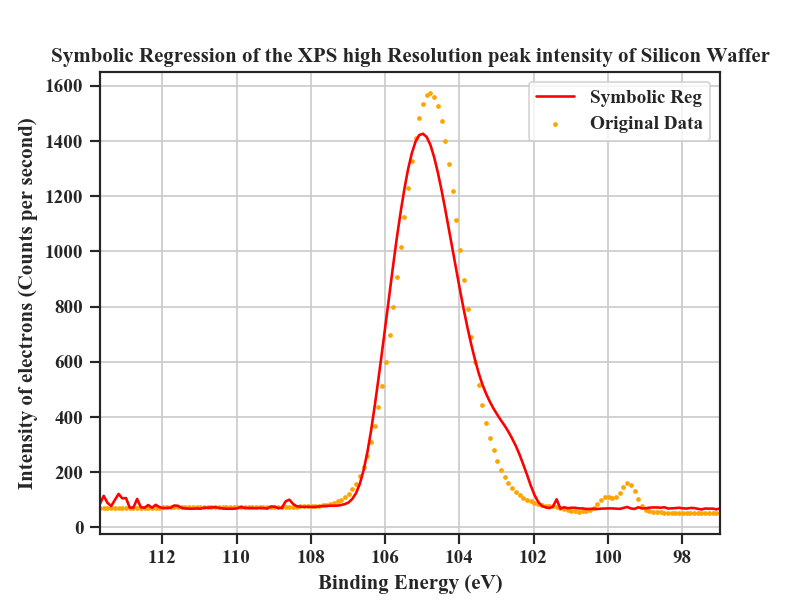

In [12]:
# Plot to see the results
plt.figure()
plt.scatter(X0, df.yCal, c='orange', label='Original Data', s=3)
plt.plot(X0, y_new, c='red', label='Symbolic Reg')

plt.title('Symbolic Regression of the XPS high Resolution peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.legend()
plt.grid()
plt.xlim(df.x.max(), df.x.min())
plt.show()

In [14]:
# It is possible to keep doing more iterations (more generations) with the already determined values,
# This might improve the shape of the Regression
est_gp2.set_params(generations=100, warm_start=True, parsimony_coefficient=.003)

# Run again the fit value to continue with the data
est_gp2.fit(np.array(df.x).reshape(-1, 1), np.array(df.yCal))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
  50   410.34      1.70958e+33     1216          34.8818              N/A      3.82m
  51   475.52     8.00108e+192      326          32.8636              N/A      4.19m
  52   521.84     2.20352e+206      286            31.61              N/A      4.53m
  53   651.74      1.10952e+78      245          31.2337              N/A      5.17m
  54   676.51      2.89686e+45      328          28.2253              N/A      5.28m
  55   361.57      2.89686e+45      226          25.2694              N/A      3.05m
  56   313.86     5.11598e+128      246          23.9352              N/A      2.68m
  57   315.73     9.17326e+105      247          23.8672              N/A      2.64m
  58   294.13      2.89769e+45      255          23.7159              N/A  

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply


  98   242.86              inf      289          7.05702              N/A      3.30s
  99   238.82              inf      286          7.05504              N/A      0.00s


SymbolicRegressor(const_range=(-5, 5), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'div', 'sin',
                                'neg',
                  generations=100, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=1.0, metric='mean absolute error', n_jobs=1,
                  p_crossover=0.7, p_hoist_mutation=0.01, p_point_mutation=0.01,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.003, population_size=2000,
                  random_state=None, stopping_criteria=0.01, tournament_size=10,
                  verbose=1, warm_start=True)

In [16]:
print(est_gp2._program)
y_3 = add(sq(sin(sin(X0))), add(sin(add(sin(sin(sin(add(sin(sin(div(mul(X0, -3.222), neg(
    4.847)))), add(sin(neg(mul(div(mul(X0, -3.222), neg(4.847)), -3.222))), cu(neg(
    -4.231))))))), X0)), add(sin(div(mul(X0, -3.222), neg(div(X0, 1.583)))), add(
    sin(div(X0, cu(X0))), add(sin(neg(mul(X0, -3.222))), add(sq(add(sin(add(sin(neg(
    sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(
    neg(sin(div(X0, -3.897))), add(sin(div(mul(mul(sin(sin(X0)), -3.222), -3.222), neg(
    4.847))), add(sq(add(neg(sin(X0)), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(
    4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(sin(neg(sin(div(
    X0, -3.897)))), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(
    sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222), neg(
    4.847)), -3.222), div(X0, -3.897))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(
    neg(-4.217), div(sub(1.243, X0), 1.583)))))))))), add(sin(add(sin(sin(div(mul(
    X0, -3.222), neg(4.847)))), add(sin(neg(mul(div(mul(X0, -3.222), neg(4.847)), -3.222))), cu(
    neg(-4.231))))), cu(cu(sin(add(div(X0, -3.897), div(X0, 1.583))))))))))), add(sin(add(sin(
    sin(4.847)), add(div(X0, -3.897), cu(cu(cu(sin(add(add(neg(-4.217), div(
    sub(1.243, X0), 1.583)), div(X0, 1.583))))))))), add(sin(div(sin(div(mul(
    X0, -3.222), neg(4.847))), neg(4.847))), add(sin(add(neg(-4.217), sin(neg(
    sin(X0))))), add(sin(div(X0, mul(cu(2.679), -3.222))), add(neg(sin(div(
    X0, -3.897))), add(sin(div(sub(1.243, X0), 1.583)), div(mul(X0, -3.222), neg(4.847))))))))))))))

add(sq(sin(sin(X0))), add(sin(add(sin(sin(sin(add(sin(sin(div(mul(X0, -3.222), neg(4.847)))), add(sin(neg(mul(div(mul(X0, -3.222), neg(4.847)), -3.222))), cu(neg(-4.231))))))), X0)), add(sin(div(mul(X0, -3.222), neg(div(X0, 1.583)))), add(sin(div(X0, cu(X0))), add(sin(neg(mul(X0, -3.222))), add(sq(add(sin(add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(neg(sin(div(X0, -3.897))), add(sin(div(mul(mul(sin(sin(X0)), -3.222), -3.222), neg(4.847))), add(sq(add(neg(sin(X0)), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(sin(neg(sin(div(X0, -3.897)))), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), div(X0, -3.897))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(sub(1.243, X0), 1.583)))))))))), add(sin(add(sin(sin(div(mul(X0, -3.222), neg(4.847)))), add(sin(neg(m

<IPython.core.display.Javascript object>


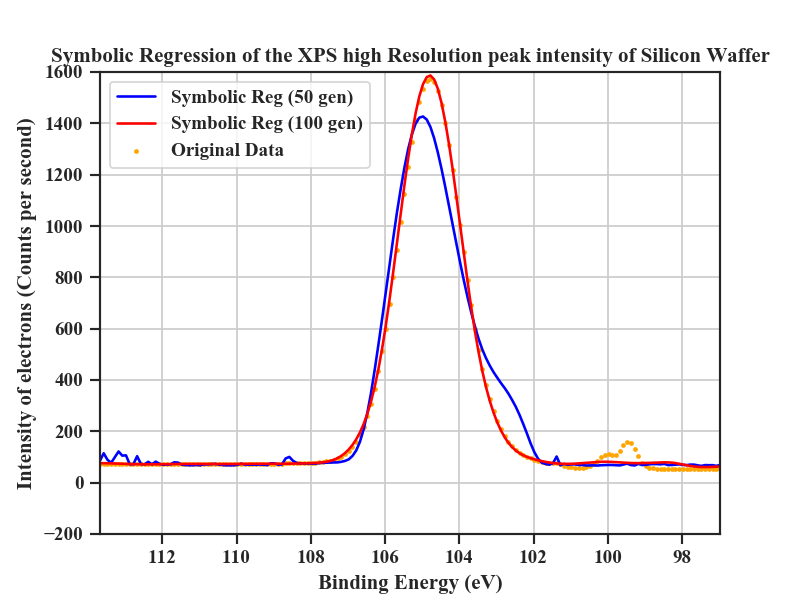

In [21]:
plt.figure()

plt.scatter(X0, df.yCal, c='orange', label='Original Data', s=3)
plt.plot(X0, y_new, c='blue', label='Symbolic Reg (50 gen)')
plt.plot(X0, y_3, c='red', label='Symbolic Reg (100 gen)')

plt.title('Symbolic Regression of the XPS high Resolution peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.legend()
plt.grid()
plt.xlim(df.x.max(), df.x.min())
plt.ylim(-200,1600)
plt.show()

In [23]:
est_gp2.set_params(generations=150, warm_start=True, parsimony_coefficient=.004)
# Run again the fit value to continue with the data
est_gp2.fit(np.array(df.x).reshape(-1, 1), np.array(df.yCal))
print(est_gp2._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
 100   245.39     1.65504e+217      289          7.01229              N/A      2.55m
 101   252.01      8.81181e+54      292          6.93856              N/A      2.65m


/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply
/home/dhdzmota/.local/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


 102   258.38              inf      292          6.93856              N/A      2.54m
 103   259.24      3.7179e+167      292          6.93856              N/A      2.59m
 104   258.88     9.66713e+143      292          6.93856              N/A      2.42m
 105   255.62     1.50333e+218      289          6.93154              N/A      2.39m
 106   251.45     4.85149e+143      285          6.90644              N/A      2.29m
 107   251.90      9.09858e+77      304          6.89386              N/A      2.24m
 108   248.43     1.65504e+217      304          6.89386              N/A      2.22m
 109   246.50     4.84944e+143      285          6.90644              N/A      2.13m
 110   244.80     1.65504e+217      285          6.90644              N/A      2.04m
 111   239.83              inf      285          6.90644              N/A      1.95m
 112   241.61              inf      285          6.90644              N/A      1.98m
 113   243.04      6.54841e+83      311          6.79228         

In [24]:
y_4 = add(sq(sin(sin(X0))), add(sin(add(neg(div(X0, 1.583)), X0)), add(sin(div(mul(X0, -3.222), neg(div(X0, 1.583)))), add(sin(div(X0, neg(-4.217))), add(sq(sin(sin(X0))), add(sin(div(mul(X0, -3.222), neg(div(X0, 1.583)))), add(sin(div(X0, neg(-4.217))), add(sq(sin(sin(X0))), add(sin(add(sin(div(mul(X0, -3.222), neg(4.847))), X0)), add(cu(sin(neg(-4.217))), add(sin(div(X0, neg(-4.217))), add(sin(neg(mul(X0, -3.222))), add(sq(add(sin(add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(neg(sin(div(X0, -3.897))), add(sin(div(mul(mul(sin(sin(X0)), -3.222), -3.222), neg(4.847))), add(sq(add(neg(sin(X0)), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(sin(neg(sin(neg(-4.217)))), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), div(X0, -3.897))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(sub(1.243, X0), 1.583)))))))))), add(sin(add(sin(sin(sin(div(mul(X0, -3.222), neg(4.847))))), add(sin(neg(mul(div(mul(X0, -3.222), neg(4.847)), -3.222))), cu(neg(-4.231))))), cu(cu(sin(add(div(X0, -3.897), div(X0, 1.583))))))))))), add(sin(add(sin(sin(4.847)), div(X0, -3.897))), add(neg(sin(div(X0, -3.897))), add(sin(add(neg(-4.217), sin(neg(sin(X0))))), add(sin(div(X0, mul(cu(2.679), -3.222))), add(sin(add(div(X0, -3.897), div(X0, 1.583))), add(sin(div(cu(neg(-4.231)), 1.583)), add(sin(cu(sin(add(div(X0, -3.897), div(X0, 1.583))))), div(mul(X0, -3.222), neg(4.847))))))))))))))))))))))

In [47]:
est_gp2.set_params(generations=1200, warm_start=True, parsimony_coefficient=.002)
# Run again the fit value to continue with the data
est_gp2.fit(np.array(df.x).reshape(-1, 1), np.array(df.yCal))
print(est_gp2._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply


1000   271.02              inf      269          4.74092              N/A     12.48m
1001   269.94      2.80349e+94      269          4.74092              N/A     12.02m
1002   269.08     2.10752e+167      269          4.74092              N/A     12.08m
1003   271.71      2.25908e+75      270           4.7401              N/A     11.99m
1004   271.28     3.04928e+154      270           4.7401              N/A     11.91m
1005   270.91      1.12019e+49      267           4.7158              N/A     11.88m
1006   266.37     5.54789e+161      267           4.7158              N/A     11.68m
1007   266.57      6.70339e+83      267           4.7158              N/A     11.71m
1008   268.20      5.16758e+52      267           4.7158              N/A     12.14m
1009   268.13     1.02442e+143      281          4.68809              N/A     11.47m
1010   271.13      1.13245e+96      281          4.68809              N/A     12.41m
1011   264.33     3.33309e+217      281          4.68809         

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply
/home/dhdzmota/.local/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


1022   271.42              inf      282          4.59432              N/A     11.70m
1023   275.52     1.95983e+100      294          4.55588              N/A     12.50m
1024   277.69      5.12816e+52      294          4.55588              N/A     11.11m
1025   274.55        9.306e+69      296          4.56108              N/A     11.03m
1026   277.47     4.85149e+143      295          4.55766              N/A     10.88m
1027   276.11      1.03606e+53      295          4.55766              N/A     11.50m
1028   272.93     4.56141e+168      295          4.55766              N/A     11.05m
1029   273.56       6.3247e+91      295          4.55766              N/A     10.50m
1030   271.24     3.33309e+217      295          4.55766              N/A     10.91m
1031   267.38      4.40591e+54      295          4.55766              N/A     11.09m
1032   274.23      4.69477e+55      295          4.55766              N/A     10.26m
1033   272.61      2.40195e+42      295          4.55766         

/home/dhdzmota/.local/lib/python3.7/site-packages/gplearn/functions.py:46: RuntimeWarning: invalid value encountered in sin
  return self.function(*args)


1096   336.83              nan      341              nan              N/A      7.66m
1097   332.15              nan      345              nan              N/A      7.22m
1098   339.10              nan      328              nan              N/A      7.26m
1099   354.03              nan      333              nan              N/A      7.37m


/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


1100   393.26              nan      524              nan              N/A      7.95m
1101   414.69              nan      576              nan              N/A      8.09m
1102   436.63              nan      336              nan              N/A      8.41m
1103   459.23              nan      676              nan              N/A      9.34m
1104   482.68              nan      577              nan              N/A     10.32m
1105   510.30              nan      626              nan              N/A      9.31m
1106   533.25              nan      769              nan              N/A      9.89m
1107   558.84              nan      847              nan              N/A      9.87m
1108   587.74              nan      309              nan              N/A     10.09m


/home/dhdzmota/.local/lib/python3.7/site-packages/gplearn/functions.py:46: RuntimeWarning: invalid value encountered in add
  return self.function(*args)


1109   613.41              nan      875              nan              N/A      9.95m
1110   638.61              nan      350              nan              N/A     10.80m
1111   658.80              nan      370              nan              N/A     10.68m
1112   673.87              nan      262              nan              N/A     11.15m
1113   705.95              nan      711              nan              N/A     10.55m
1114   718.79              nan     1252              nan              N/A     10.52m
1115   738.73              nan      812              nan              N/A     10.97m
1116   760.60              nan      770              nan              N/A     11.24m
1117   793.02              nan     1027              nan              N/A     11.87m
1118   832.42              nan      976              nan              N/A     11.88m
1119   862.28              nan     1005              nan              N/A     11.76m
1120   887.71              nan      874              nan         

/home/dhdzmota/.local/lib/python3.7/site-packages/gplearn/functions.py:46: RuntimeWarning: overflow encountered in multiply
  return self.function(*args)


1139  1302.05              nan     1400              nan              N/A     12.32m
1140  1365.44              nan     1388              nan              N/A     12.87m
1141  1393.75              nan     1184              nan              N/A     13.36m
1142  1398.15              nan     1200              nan              N/A     12.50m
1143  1452.17              nan      891              nan              N/A     12.77m
1144  1473.74              nan     1207              nan              N/A     12.63m
1145  1524.14              nan     1803              nan              N/A     12.96m
1146  1550.53              nan     1065              nan              N/A     12.88m
1147  1585.47              nan     1429              nan              N/A     12.81m
1148  1602.37              nan     1593              nan              N/A     13.84m
1149  1618.95              nan     1812              nan              N/A     12.57m
1150  1651.06              nan     1120              nan         

/home/dhdzmota/.local/lib/python3.7/site-packages/gplearn/functions.py:46: RuntimeWarning: invalid value encountered in multiply
  return self.function(*args)


1170  2087.83              nan      763              nan              N/A      9.55m
1171  2103.10              nan     1926              nan              N/A      9.60m
1172  2119.15              nan     1032              nan              N/A      8.93m
1173  2187.82              nan     2369              nan              N/A      8.96m
1174  2238.29              nan      666              nan              N/A      8.84m
1175  2352.31              nan     2802              nan              N/A      8.84m
1176  2352.32              nan     3508              nan              N/A      8.43m
1177  2392.88              nan     1500              nan              N/A      8.30m
1178  2435.76              nan     1593              nan              N/A      8.13m
1179  2416.66              nan     3212              nan              N/A      7.86m
1180  2458.82              nan     3417              nan              N/A      7.16m
1181  2490.86              nan     1500              nan         

In [41]:
y_5 = add(sq(sin(sin(X0))), add(sin(add(sin(div(mul(X0, -3.222), neg(4.847))), X0)), add(sin(4.629), add(sin(div(X0, neg(-4.217))), add(sin(add(neg(div(X0, 1.583)), X0)), add(sin(add(sin(neg(mul(X0, -3.222))), X0)), add(sin(4.847), add(sin(div(X0, neg(-4.217))), add(sq(sin(neg(sub(X0, -3.001)))), add(sin(add(neg(div(X0, 1.583)), X0)), add(sin(4.629), add(sq(sin(X0)), add(sin(add(neg(div(X0, 1.583)), X0)), add(sin(4.629), add(sin(div(X0, neg(-4.217))), add(sin(neg(mul(X0, -3.222))), add(sq(add(sin(add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(neg(sin(div(X0, -3.897))), add(sin(div(mul(mul(sin(sin(X0)), -3.222), -3.222), neg(4.847))), add(sq(add(neg(sin(X0)), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(sin(neg(sin(neg(-4.217)))), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(neg(sin(neg(-4.217))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(sub(1.243, X0), 1.583)))))))))), add(sin(add(sin(sin(div(mul(X0, -3.222), neg(4.847)))), add(sin(neg(mul(div(mul(X0, -3.222), neg(4.847)), -3.222))), cu(neg(-4.231))))), cu(cu(sin(add(div(X0, -3.897), div(X0, 1.583))))))))))), add(sin(div(X0, 1.583)), add(sin(sub(sub(sin(-1.434), add(X0, X0)), X0)), add(sin(add(neg(-4.217), sin(add(X0, X0)))), add(sin(neg(-4.231)), add(sin(add(div(X0, -3.897), div(X0, 1.583))), div(mul(X0, -3.222), neg(4.847))))))))))))))))))))))))
y_6 = add(sin(add(neg(div(neg(div(X0, 1.583)), 1.583)), X0)), add(sin(add(mul(X0, 1.909), X0)), add(sin(4.847), add(sin(div(X0, 4.141)), add(sin(add(neg(div(X0, 1.583)), X0)), add(sin(add(sin(neg(mul(X0, -3.222))), X0)), add(sin(4.847), add(sin(neg(mul(X0, -3.222))), add(sin(div(X0, 4.141)), add(sin(add(neg(div(neg(div(X0, 1.583)), 1.583)), X0)), add(sin(4.847), add(sq(sin(X0)), add(sin(add(neg(div(X0, 1.583)), X0)), add(-1.106, add(sin(div(X0, 4.141)), add(sin(neg(mul(X0, -3.222))), add(sq(add(sin(add(sin(sin(neg(sin(div(X0, -3.897))))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(neg(sin(div(X0, -3.897))), add(sin(div(mul(mul(sin(sin(X0)), -3.222), -3.001), neg(4.847))), add(sq(add(neg(sin(X0)), add(sq(sin(div(mul(div(mul(X0, -3.222), 4.847), -3.222), 4.847))), add(add(div(-3.557, X0), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(div(X0, -3.897), div(X0, 1.583)))))), add(neg(sin(neg(-4.217))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(sub(1.243, X0), 1.583)))))))))), add(sin(add(sin(sin(sin(div(mul(X0, -3.222), neg(4.847))))), add(sin(mul(div(mul(X0, -3.222), 4.847), neg(-2.997))), cu(neg(-4.231))))), cu(cu(sin(add(div(X0, -3.897), div(X0, 1.583))))))))))), add(sin(div(mul(X0, -3.222), 4.847)), add(sin(sub(sub(-0.687, add(X0, X0)), X0)), add(sin(sq(sin(X0))), add(-1.106, add(sin(add(div(X0, -3.897), div(X0, 1.583))), div(mul(X0, -3.222), neg(4.847))))))))))))))))))))))))

<IPython.core.display.Javascript object>


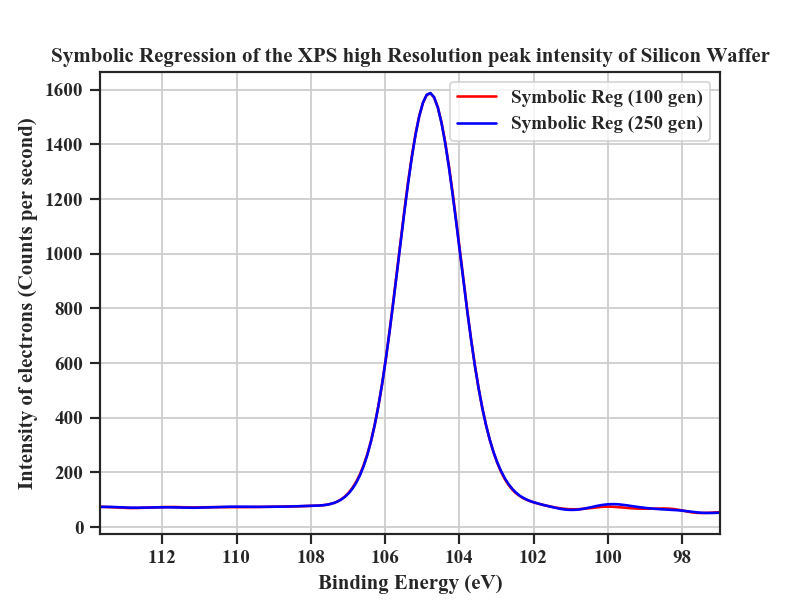

In [46]:
plt.figure()
#plt.scatter(X0, df.yCal, c='orange', label='Original Data', s=3)
#plt.plot(X0, y_new, c='blue', label='Symbolic Reg (50 gen)')
plt.plot(X0, y_5, c='red', label='Symbolic Reg (100 gen)')
plt.plot(X0, y_6, c='blue', label='Symbolic Reg (250 gen)')

#plt.plot(X0, df.yCal-y_3, c='blue', label='Symbolic Reg (150 gen)')
#plt.plot(X0, df.yCal-y_4, c='green', label='Symbolic Reg (150 gen)')


plt.title('Symbolic Regression of the XPS high Resolution peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.legend()
plt.grid()
plt.xlim(df.x.max(), df.x.min())
#plt.ylim(-200,1600)
plt.show()